# Лінійна регресія

У цьому домашньому завданні ми працюємо з набором даних про рівень щастя у країнах за 2019 рік. Він доступний в кабінеті або можна завантажити з Kaggle [змагання](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Усі імпорти розміщуємо зверху, під цією секцією.

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

1. Зчитайте дані за допомогою pandas у змінну `df`.

In [2]:
# ваш код тут
df = pd.read_csv("./datasets/happiness_index/2019.csv", index_col="Overall rank")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


2. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita`, використовуючи метод `regplot()` з `seaborn`.

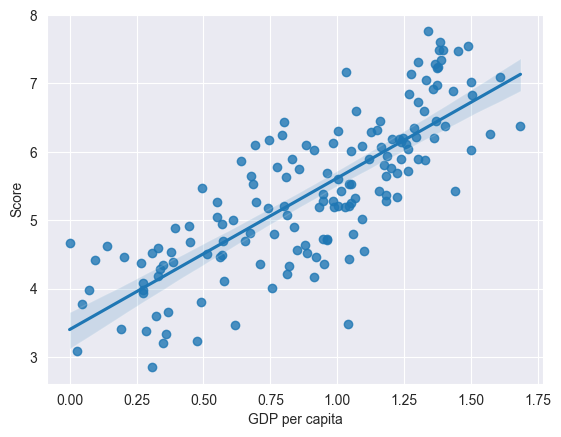

In [92]:
sns.regplot(x=df["GDP per capita"], y=df["Score"]);

Ми моделюватимемо цю залежність. Тобто незалежною змінною є `GDP per capita`, залежною `Score`. Судячи з діаграми розсіювання, залежність між цими двома змінними має добре описуватись лінійною моделлю.

## Розв'язання задачі лінійної регресії методом градієнтного спуску

Позначення:
- `X` - матриця ознак
- `y` - цільова змінна
- `theta` - вектор параметрів
- `alpha` - темп навчання (learning rate)

<font color='blue'>**[Optional]**</font> 3. Реалізуйте формулу передбачення лінійної регресії у методі `predict`. Метод повертає передбачення. Нагадаю, що для кожного спостереження з матриці ознак передбачення знаходимо за допомогою наступної формули:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{де m - кількість спостережень, } \\ 
\text{n - кількість ознак, } \\
x_0 = 1 \ \text{для всіх спостережень}.
$$

Передбачення всіх спостережень у матриці Х можемо знайти як множення матриці ознак на ваги.

In [48]:
def predict(X: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return np.dot(X, theta)

<font color='blue'>**[Optional]**</font> 4. Доповніть обчислення значення функції витрат, формула якої наведена в слайдах лекції про лінійну регресію (підказка - формула така сама, якби ми рахували середньоквадратичну помилку).  
Метод `cost()` приймає вектор параметрів `theta`, матрицю наших ознак `X` та реальні значення цільової змінної `y`.


In [5]:
def cost(y_true, y_estimate) -> float:
    m = len(y_true)
    return np.sum((y_estimate - y_true) ** 2) / (2*m)


a = np.arange(10)
b = np.arange(10, 20)

cost_value = cost(a, b)
assert cost(a, b) == 50

<font color='blue'>**[Optional]**</font> 5. Ознайомтеся з реалізацією методу `get_gradient()`, який повертає вектор часткових похідних функції витрат за кожним із параметрів лінійної регресії.
Доповніть метод `gradient_descent()`, який дозволить реалізувати алгоритм градієтного спуску. Під час градієнтного спуку ми оновлюємо параметри згідно з формулою:
$$
\text{для кожного} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\ 
\text{де n - кількість ознак}
$$
  Метод градієнтного спуску оновлює ваги (модель навчається) поки вони не перестануть змінюватися від ітерації до ітерації, тобто поки Евклідова відстань (звичайна відстань між веткорами, як у шкільній геометрії) між векторами ваг за останні дві ітерації не буде меншою за невелику константу (зазвичай позначається як $\epsilon$ (епсілон), ми встановимо $\epsilon=10^{-6}$).

В `gradient_descent()` заповніть всі місця, де стоять три крапки. Використовуйте реалізовані у попередніх завданнях методи `cost()` та `predict()`, і звичайно ж Вам знадобиться метод `get_gradient()`.

In [6]:
def get_gradient(X: np.ndarray, y: np.ndarray, y_estimate: np.ndarray) -> int:
    return np.dot(X.T, (y_estimate - y)) / len(X)

In [7]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1

    while True:
        y_estimate = np.dot(X, theta)
        cost_value = cost(y, y_estimate)

        gradient = get_gradient(X, y, y_estimate)
        new_theta = theta - learning_rate * gradient

        cost_history.append(cost_value)
        theta_history.append(new_theta)

        if cost_value < eps:
            print("Алгоритм зійшовся.")
            break

        if iterations >= max_iterations:
            print("Досягнуто максимальної кількості ітерацій")
            break

        if iterations % 100 == 0:
            print("Ітерація: %d - Помилка на трейн даних: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations

Підготуємо дані.

In [195]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6. Розділіть `X` та `y` на `train` і `test` підвиборки у співвідношенні 80/20. Оскільки у нас мало даних, валідаційну вибірку не виділятимемо. Запишіть результати у `X_train`, `y_train`, `X_test`, `y_test`.

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=38)


min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X_train)
min_max_scaled = min_max_scaler.transform(X)

7.Реалізуйте масштабування ознак із використанням `MinMaxScaler`. Пам'ятайте про те, як ми застосовуємо масштабування ознак на`train` та `test` вибірках.

In [197]:
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# min_max_scaler.fit(X_train)
# min_max_scaled = min_max_scaler.transform(X)

<font color='blue'>**[Optional]**</font> 8. Додайте колонку з одиниць до масивів `X_train`, `X_test`.

In [198]:
X_train = np.concatenate((
        np.ones((len(X_train), 1)),
        X_train,
    ), axis=1
)

X_test = np.concatenate((
        np.ones((len(X_test), 1)),
        X_test,
    ), axis=1
)

<font color='blue'>**[Optional]**</font> 9. Встановіть темп навчання рівний 0.01, точність епсілон рівний $10^{-6}$, кількість ітерацій дорівнює 20000 і запустіть градієнтний спуск на тренувальні дані, передавши всі необхідні параметри.

In [199]:
learning_rate = 0.01
max_iterations = 20_000
epsilon = 10 ** -6

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = gradient_descent(X_train, y_train, theta, learning_rate, epsilon, max_iterations)

Ітерація: 100 - Помилка на трейн даних: 0.7342
Ітерація: 200 - Помилка на трейн даних: 0.2463
Ітерація: 300 - Помилка на трейн даних: 0.2352
Ітерація: 400 - Помилка на трейн даних: 0.2343
Ітерація: 500 - Помилка на трейн даних: 0.2337
Ітерація: 600 - Помилка на трейн даних: 0.2333
Ітерація: 700 - Помилка на трейн даних: 0.2329
Ітерація: 800 - Помилка на трейн даних: 0.2325
Ітерація: 900 - Помилка на трейн даних: 0.2323
Ітерація: 1000 - Помилка на трейн даних: 0.2320
Ітерація: 1100 - Помилка на трейн даних: 0.2318
Ітерація: 1200 - Помилка на трейн даних: 0.2317
Ітерація: 1300 - Помилка на трейн даних: 0.2315
Ітерація: 1400 - Помилка на трейн даних: 0.2314
Ітерація: 1500 - Помилка на трейн даних: 0.2313
Ітерація: 1600 - Помилка на трейн даних: 0.2313
Ітерація: 1700 - Помилка на трейн даних: 0.2312
Ітерація: 1800 - Помилка на трейн даних: 0.2311
Ітерація: 1900 - Помилка на трейн даних: 0.2311
Ітерація: 2000 - Помилка на трейн даних: 0.2311
Ітерація: 2100 - Помилка на трейн даних: 0.2310
І

<font color='blue'>**[Optional]**</font> 10. Відобразіть на лінійному графіку значення змінної `cost_history`. Використовуйте будь-яку бібліотеку для візуалізації на вибір.

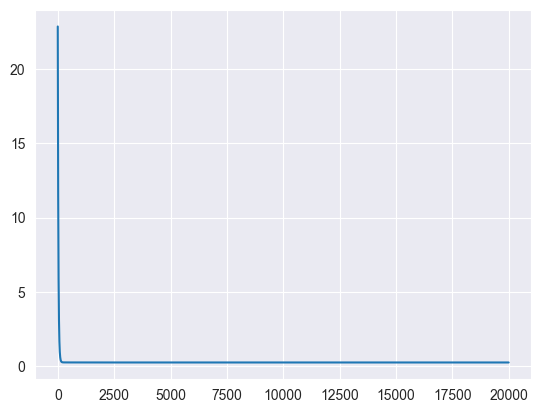

In [200]:
sns.lineplot(cost_history);

Відобразіть лише перші 200 ітерацій. Схоже, що після них модель мало навчається. Ми могли б застосувати техніку early stopping у даному випадку та зупинитися на деякій невеликій кількості ітерацій. Зазвичай ця техніка застосовується, щоб уникнути перенавчання. При цьому втрачається трохи точності на train set.

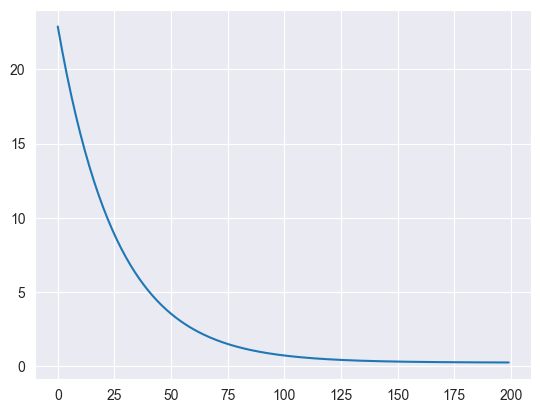

In [201]:
sns.lineplot(cost_history[:200]);

Виведемо отримані параметри та останнє значення функції витрат.

In [202]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.382,
Theta1:          2.244
Final cost/MSE:  0.231
Number of iterateions: 20000


<font color='blue'>**[Optional]**</font> 11. Знайдіть прогнози на `X_train`, `X_test` та порахуйте `mean_squared_error` помилку прогнозів обох підвибірках.

In [203]:
train_result = predict(X_train, theta)
mean_squared_error(y_train, train_result)

0.4617222753807716

In [204]:
test_result = predict(X_test, theta)
mean_squared_error(y_test, test_result)

0.430567626022202

<font color='blue'>**[Optional]**</font> 12. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita` та додайте лінію прогнозу моделі.

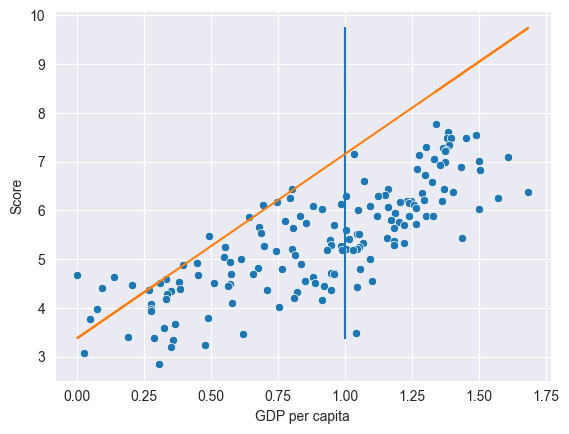

In [145]:
X = df['GDP per capita'].values.reshape(-1,1)
X = np.concatenate((
        np.ones((len(X), 1)),
        X,
    ), axis=1
)

predicted_y = predict(X, theta)

sns.scatterplot(x=df["GDP per capita"], y=df["Score"]);
plt.plot(X, predicted_y);

13. Навчіть лінійну регресію на наборі даних, що складається тільки з ознаки `GDP per capita`, але тепер використовуючи LinearRegression з sklearn.   
Подумайте, чи треба в sklearn модель подавати стовпчик з одиниць, яку ми подавали в самописну модель.

In [151]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)


min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X)
min_max_scaled = min_max_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(min_max_scaled, y, test_size=0.2, shuffle=True, random_state=38)

l_regression = LinearRegression()
l_regression.fit(X_train, y_train)
l_regression.score(X_test, y_test)

0.4875779449251836

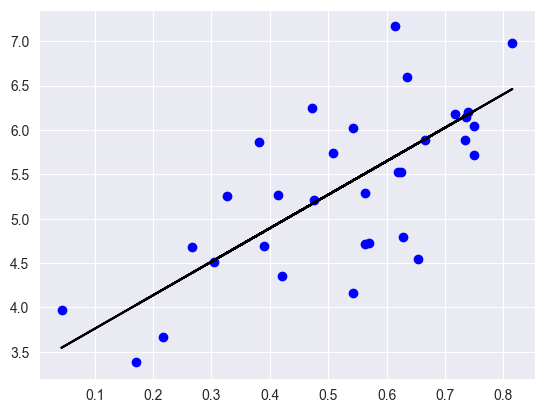

In [152]:
y_pred = l_regression.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

Порівняйте помилку на тестовій вибірці лінійної регресії, написаної вами, та зі sklearn. Чи є різниця у значеннях?

In [101]:
# ^^ above

14. Навчимо лінійну регресію на більшій кількості ознак і подивимося, чи вдасться покращити модель.

14.1 Навчіть лінійну регресію з sklearn використовуючи як набор ознак наступний: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`

Не забудьте:  
1. Розділити `train` та `test`.
2. Нормувати кожну колонку даних. 

In [163]:
X = df.drop(["Score", "Country or region"], axis=1)
y = df['Score']

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X)
min_max_scaled = min_max_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(min_max_scaled, y, test_size=0.2, shuffle=True, random_state=38)
l_regression = LinearRegression()
l_regression.fit(X_train, y_train)


LinearRegression()

14.2 Виведіть помилку прогнозу на `train` та `test` вибірках. Порівняйте з результатом, отриманим під час навчання однією ознакою. Чи змінилися метрики?

In [168]:
# R^2
print(
    l_regression.score(X_test, y_test),
    l_regression.score(X_train, y_train)
)

# MSE
mean_squared_error(y_test, l_regression.predict(X_test))

0.652706580493325 0.7943137011970527


0.29181668049470894

14.3 Виведіть коефіцієнти моделі і визначте, які ознаки мають найбільші коефіцієнти по модулю, що стоять перед ними (достатньо вивести назви ознак і коефіцієнти в одному датафреймі).

In [176]:
print(pd.DataFrame(l_regression.coef_))

          0
0  1.370852
1  2.016588
2  0.970879
3  0.724860
4  0.651509
5  0.480453


15. Навчіть модель поліноміальної регресії зі ступенем 2 на тих самих даних, що й у попередньому пункті. Використовуйте у процесі навчання `PolynomialFeatures`. Дослідіть метрики якості на трейні та тест датасетах. Чи є перенавчання (overfit)?

In [210]:
X = df.drop(["Score", "Country or region"], axis=1)
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=38)

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X_train)
min_max_scaled = min_max_scaler.transform(X)

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(min_max_scaled)

l_regression = LinearRegression()
l_regression.fit(X_train, y_train)
l_regression.score(X_test, y_test), mean_squared_error(y_test, l_regression.predict(X_test))

(0.6527065804933253, 0.29181668049470866)

16. Зробіть пайплайн із кроками `MinMaxScaler`, `PolynomialFeatures` та `ElasticNet`. 

Яка модель у домашньому завданні дала найкращі значення середньоквадратичної помилки на тестових даних, лін. регресія написана самостійно, лін. регресія зі sklearn, поліноміальна регресія?

In [212]:
X = df.drop(["Score", "Country or region"], axis=1)
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=38)

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X_train)
min_max_scaled = min_max_scaler.transform(X)


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures()),
    ('elastic_net', ElasticNet()),
])

pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)
pipeline.score(X_test, y_test), mean_squared_error(y_test, result)

(-0.0076332092705027055, 0.846673624577263)

Answer: Polynomial Regression